In [37]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models, layers

In [23]:
df = pd.read_csv('dataset.csv')
df.head(10)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
5,Image_6.jpg,CAIRNS BIRDWING
6,Image_7.jpg,GREEN CELLED CATTLEHEART
7,Image_8.jpg,EASTERN DAPPLE WHITE
8,Image_9.jpg,BROWN SIPROETA
9,Image_10.jpg,RED POSTMAN


In [24]:
CLASSES_COUNT = 7
classes_list = df['label'].value_counts()[:CLASSES_COUNT].index.tolist()
classes_list

['MOURNING CLOAK',
 'SLEEPY ORANGE',
 'ATALA',
 'BROWN SIPROETA',
 'CRECENT',
 'SCARCE SWALLOW',
 'BANDED ORANGE HELICONIAN']

In [25]:
df = df[df['label'].isin(classes_list)]
len(df)

728

In [26]:
df['label'].nunique()

7

In [27]:
samples_cnt_by_label = df['label'].value_counts()
samples_cnt_by_label

label
MOURNING CLOAK              131
SLEEPY ORANGE               107
ATALA                       100
BROWN SIPROETA               99
SCARCE SWALLOW               97
CRECENT                      97
BANDED ORANGE HELICONIAN     97
Name: count, dtype: int64

<Axes: title={'center': 'Samples distribution by label'}, xlabel='label'>

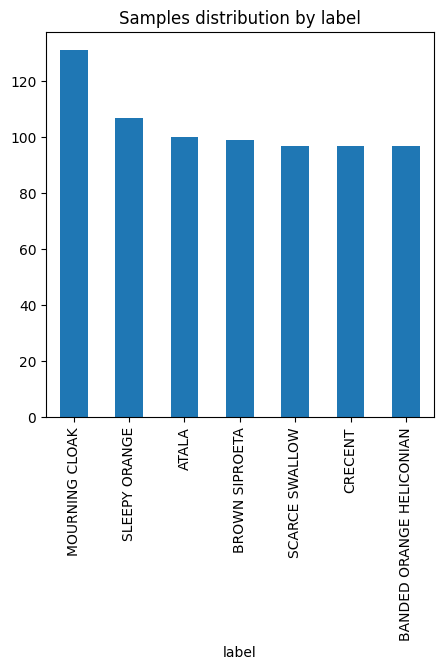

In [28]:
samples_cnt_by_label.plot.bar(x='label', y='count', figsize=(5, 5), title='Samples distribution by label')

In [29]:
def load_images(input_df, base_path=os.path.join('.', 'images')):
    images = []
    labels = []

    for i in range(len(input_df)):
        df_row = df.iloc[i]
        image_path = os.path.join(base_path, df_row['filename'])
        src_image = cv2.imread(image_path)
        images.append(cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB))
        labels.append(df_row['label'])

    return np.array(images), np.array(labels)


images, labels = load_images(df)
print(images.shape)

(728, 224, 224, 3)


In [30]:
X = images
Y = labels

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42, stratify=Y)

print(f"Train dataset size={X_train.shape[0]}")
print(f"Test dataset size={X_test.shape[0]}")

Train dataset size=582
Test dataset size=146


In [31]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [32]:
X_train[0].shape # sizes of all images are the same

(224, 224, 3)

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(CLASSES_COUNT, activation='softmax'))

C:\Dev_software\python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,543 (1006.03 KB)

 Trainable params: 257,543 (1006.03 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
print(X_train.dtype)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    Y_train,
    epochs=15,
    validation_data=(X_test, Y_test)
)

float64
Epoch 1/15


C:\Dev_software\python\lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - accuracy: 0.9880 - loss: 0.0252 - val_accuracy: 0.9110 - val_loss: 0.4014
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.8836 - val_loss: 0.5615
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.9991 - loss: 0.0072 - val_accuracy: 0.8630 - val_loss: 0.7373
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.9944 - loss: 0.0169 - val_accuracy: 0.8767 - val_loss: 0.6752
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - accuracy: 0.9513 - loss: 0.1202 - val_accuracy: 0.9110 - val_loss: 0.2924
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.9784 - loss: 0.0385 - val_accuracy: 0.9178 - val_loss: 0.2035
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 0.9996 - loss: 0.0045 - val_accuracy: 0.9452 - val_loss: 0.1882
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.9041 - val_

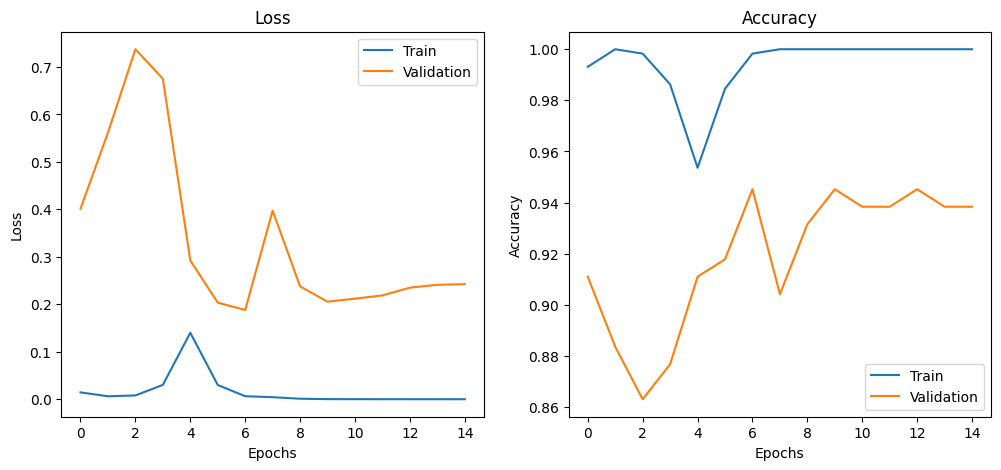

In [48]:
def plot_train_val_history(history):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    
plot_train_val_history(history)